In [1]:
import os
import numpy as np
import pandas as pd
import csv

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

import seaborn as sns
sns.set(context="paper", font_scale=1.5, rc={"lines.linewidth": 2}, font='DejaVu Serif')
#import bottleneck as bn

In [2]:
def loadFilesNamePath(directorRoot: str):
    l_files_name_path = []
    for path, subdirs, files in os.walk(directorRoot):
        for name in files:
            l_files_name_path.append(os.path.join(path, name))
    return l_files_name_path

In [3]:
def loadFile(file_name):
    with open(file_name, 'r') as f:
        file_data = f.read()
        f.close()
    return file_data.splitlines()

In [4]:
"""
========
Function Generating Barchart
========

A bar plot with errorbars and height labels on individual bars
"""
def barCharGenerator(groupListData: list, ListLabel: list, groupListLegend: list
                     , ylabel: str, xlabel: str, title: str, figSize=(15, 9)):
    N = 4
    ind = np.arange(N)  # the x locations for the groups
    width = 0.12       # the width of the bars
    std_CoFactor = [0.01, 0.01, 0.01, 0.01]
    std_1 = [0.02, 0.02, 0.02, 0.02]
    std_2 = [0.01, 0.01, 0.01, 0.01]
    std_3 = [0.02, 0.02, 0.02, 0.02]
    std_4 = [0.01, 0.01, 0.01, 0.01]
    std_5 = [0.01, 0.01, 0.01, 0.01]
    
    #Zerando os pausinhos em cima das barras
    std_CoFactor = std_1 = std_2 = std_3 = std_4 = std_5 = [0,0,0,0]
    
    CoFactor = groupListData[0]
    Other_1 = groupListData[1]
    Other_2 = groupListData[2]
    Other_3 = groupListData[3]
    Other_4 = groupListData[4]
    Other_5 = groupListData[5]

    #Define Plot
    fig, ax = plt.subplots(figsize=figSize)

    rects1 = ax.bar(ind, CoFactor, width, color='yellow', yerr=std_CoFactor)
    rects2 = ax.bar(ind + width, Other_1, width, color='olive', yerr=std_1)
    rects3 = ax.bar(ind + width*2, Other_2, width, color='darkkhaki', yerr=std_2)
    rects4 = ax.bar(ind + width*3, Other_3, width, color='darkseagreen', yerr=std_3)
    rects5 = ax.bar(ind + width*4, Other_4, width, color='lightgreen', yerr=std_4)
    rects6 = ax.bar(ind + width*5, Other_5, width, color='darkolivegreen', yerr=std_5)

    # add some text for labels, title and axes ticks
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    ax.set_xticks(ind + (width*5) / 2)
    ax.set_xticklabels(ListLabel)

    ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0], rects5[0], rects6[0]) , groupListLegend)
    
    start, end = ax.get_ylim()
    ax.yaxis.set_ticks(np.arange(start, end, 0.01))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%2.2f'))

    def autolabel(rects, mult_height):
        """
        Attach a text label above each bar displaying its height
        """
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., mult_height*height,
                    '%2.4f' % float(height),
                    ha='center', va='bottom')

    '''autolabel(rects1, 1.05)
    autolabel(rects2, 1.13)
    autolabel(rects3, 1.05)
    autolabel(rects4, 1.13)
    autolabel(rects5, 1.05)
    autolabel(rects6, 1.13)'''

    plt.show()

In [5]:
def prepraraFiles(list_file_name: list, file_path: str):    
    CoFactor_dic = {'Recall@10':0.1640,'Recall@20':0.1611, 'Recall@50':0.1842, 'Recall@100': 0.2381
                            , 'NDCG@10': 0.1675, 'NDCG@20': 0.1601, 'NDCG@50': 0.1615, 'NDCG@100': 0.1803
                            , 'MAP@10': 0.0965, 'MAP@20': 0.0780, 'MAP@50': 0.0625, 'MAP@100': 0.0593}
    file_dic = {}

    for f_name in list_file_name:
        file_name = f_name.split('_')
        key_name = str.capitalize(file_name[0])+'_'+str.capitalize(file_name[1])+'_'+file_name[2]+'%'
        list_file_content = loadFile(file_path+f_name)
        list_file_content = list(filter(None, list_file_content))
        data_dic = {}

        for line in list_file_content:
            idx = list_file_content.index(line)
            line = line.replace('Test ','').replace(' ','').split(':')
            data_dic[line[0]]=float(line[1])

        file_dic[key_name]=data_dic
    return CoFactor_dic, file_dic

In [6]:
def startCoFactorValues(CoFactor_dic: dict):
    #Determinando Cofactor Dados
    listDataNdcgCoFactor = []
    listDataRecallCoFactor = []
    listDataMapCoFactor = []
    control = 0
    
    for key, value in CoFactor_dic.items():
        control = control+1
        #Armazena Recall
        if (control in np.arange(1,5)):
            listDataRecallCoFactor.append(value)
        #Armazena NDCG
        elif (control in np.arange(5,9)):
            listDataNdcgCoFactor.append(value)
        #Armazena MAP
        elif (control in np.arange(9,13)):
            listDataMapCoFactor.append(value)

    return listDataNdcgCoFactor, listDataMapCoFactor, listDataRecallCoFactor

In [7]:
def geraGraficos(Cofactor_dic: dict, file_dic: dict, firstGroupFile: bool ):
    groupListDataNDCG = []
    groupListDataRECALL = []
    groupListDataMAP = []
    listLabel = []

    ndcg_coFactor, mapCofactor, recall_coFactor = startCoFactorValues(CoFactor_dic)

    groupListDataMAP.append(mapCofactor)
    groupListDataNDCG.append(ndcg_coFactor)
    groupListDataRECALL.append(recall_coFactor)
    listLabel.append('CoFactor')

    #Parametros de controle
    control = 0
    contador = 0


    for key_title, value_list in file_dic.items():
        cnn_name = key_title.split('_')
        listLabel.append(key_title)

        listDataNdcg = []
        listDataRecall = []
        listDataMap = []

        for key_name, value in value_list.items():
            control = control+1

            #Armazena Recall
            if (control in np.arange(1,5)):
                listDataRecall.append(value)
            #Armazena NDCG
            elif (control in np.arange(5,9)):
                listDataNdcg.append(value)
            #Armazena MAP
            elif (control in np.arange(9,13)):
                listDataMap.append(value)

        groupListDataNDCG.append(listDataNdcg)
        groupListDataMAP.append(listDataMap)
        groupListDataRECALL.append(listDataRecall)

        control = 0

        contador = contador + 1
        if contador == 5:
            contador = 0

            barCharGenerator(groupListDataRECALL, ['@10','@20','@50','@100'], listLabel
                             , 'Scores Evaluation Metrics','Recall@k', 'Comparação CoFactor Vs '+cnn_name[0])
            
            print('Recall Values:')
            if firstGroupFile:
                dataFrame = pd.DataFrame(groupListDataRECALL, index=['CoFactor', '10%', '20%', '30%', '40%', '50%']
                                         , columns=['@10', '@20', '@50', '@100'])
            else:
                dataFrame = pd.DataFrame(groupListDataRECALL, index=['CoFactor', '60%', '70%', '80%', '90%', '100%']
                                         , columns=['@10', '@20', '@50', '@100'])
            print(dataFrame)
            
            print('\n\n')    
            barCharGenerator(groupListDataNDCG, ['@10','@20','@50','@100'], listLabel
                             , 'Scores Evaluation Metrics','NDCG@k', 'Comparação CoFactor Vs '+cnn_name[0])
            print('NDCG Values:')
            if firstGroupFile:
                dataFrame = pd.DataFrame(groupListDataNDCG, index=['CoFactor', '10%', '20%', '30%', '40%', '50%']
                                         , columns=['@10', '@20', '@50', '@100'])
            else:
                dataFrame = pd.DataFrame(groupListDataNDCG, index=['CoFactor', '60%', '70%', '80%', '90%', '100%']
                                         , columns=['@10', '@20', '@50', '@100'])
            print(dataFrame)

            print('\n\n')    
            barCharGenerator(groupListDataMAP, ['@10','@20','@50','@100'], listLabel
                             , 'Scores Evaluation Metrics','MAP@k', 'Comparação CoFactor Vs '+cnn_name[0])
            print('MAP Values:')
            if firstGroupFile:
                dataFrame = pd.DataFrame(groupListDataMAP, index=['CoFactor', '10%', '20%', '30%', '40%', '50%']
                                         , columns=['@10', '@20', '@50', '@100'])
            else:
                dataFrame = pd.DataFrame(groupListDataMAP, index=['CoFactor', '60%', '70%', '80%', '90%', '100%']
                                         , columns=['@10', '@20', '@50', '@100'])
            print(dataFrame)

            groupListDataNDCG.clear()
            groupListDataRECALL.clear()
            groupListDataMAP.clear()
            listLabel.clear()

            groupListDataMAP.append(mapCofactor)
            groupListDataNDCG.append(ndcg_coFactor)
            groupListDataRECALL.append(recall_coFactor)
            listLabel.append('CoFactor')

In [8]:
file_path = 'vae_inv_norm/'

### Definição dos Dados - Descritivo

Os valores apresentados abaixo nos gráficos, correspondem aos resultados obtidos do Algoritmo CoFactor. A Barra amarela correponde a entrada padrão dos dados, no qual o algoritmo trabalha com a co-ocorrência de itens. As demais barras correpondem a entrada gerada atráves do procedimento a ser descrito abaixo.

#### Redes Neurais Convolutivas

O dataset de imagens (ml20m) foi aplicado a quatro redes neurais convolutivas para extração de suas features. Foram elas Resnet50, Vgg16, Vgg19 e Xception. Uma vez que essas features foram extraídas, uma segunda feature foi extraída de informações textuais do mesmo dataset utilizando uma rede neural chamada Doc2vec. 

Cada feature extraídas da imagens foram concatenadas com a feature de informações textuais, gerando um novo vetor de features.
- Resnet50+Doc2Vec / Vgg16+Doc2Vec / Vgg19+Doc2Vec / Xception+Doc2Vec

#### AutoEnconder's

Cada vetor de features "concatenado" foi aplicado a um tipo de AutoEnconder com o objetivo de gerar uma nova representação do vetor de features original. Os autoencoder's utilizados foram Sparse AutoEncoder, Convolutional AutoEnconder (CAE) e Varitional AutoEncoder (VAE).

As representações geradas do vetor de featuares concatenado, após aplicadas nos autoencoder's foram:

10% - Uma representação com 10% do tamanho do vetor original

20% - Uma representação com 20% do tamanho do vetor original

30% - Uma representação com 30% do tamanho do vetor original

40% - Uma representação com 40% do tamanho do vetor original

50% - Uma representação com 50% do tamanho do vetor original

60% - Uma representação com 60% do tamanho do vetor original

70% - Uma representação com 70% do tamanho do vetor original

80% - Uma representação com 80% do tamanho do vetor original

90% - Uma representação com 90% do tamanho do vetor original

100% - Uma representação com 100% do tamanho do vetor original


### Matriz de Similaridade

Foi gerado uma matrix de similaridade entre os vetores de características (vetor final gerado a partir do AutoEncoder) utilizando o método da "Distância Euclideana". Para os resultados apresentados nesse documento foi utilizado uma "Distância Euclideana Invertida e Normalizada", ou seja, valores muito proxímos de zero (ou zero) corresponde a vetores que não possuem similaridade nenhum, em contrapartida valores próximos ou igual a 1 corresponde a itens muito similares  ou identicos (o mesmo vetor).

### Metricas de Avaliação
Medidas de avaliação (ranked-based) foram utilizadas para medir o desempenho da recomendação do algoritmo ao mudar seu dataset de entrada em comparação com o dataset original proposto (co-ocorrência).

Para cada usuário, todas as métricas comparam a classficação prevista de itens "não observados" com sua classificação real. As medidas utilizadas foram Recall, NDCG e Map.

Nos resultados apresentados nos gráficos que seguem, foram considerados nos experimentos um "ranked list" de tamanhos fixados em: 10, 20, 50 e 100, para cada medida de avaliação, por exemplo, NDCG@20 significado que foi considerado um ranked list dos 20 itens no topo da lista.


### Análise Geral
Nós Gráficos apresentados nesse documento que estão relacionados ao AutoEncoder "VAE" o comportamento quanto a variação do @k para as métricas utilizadas é o mesmo observado no AutoEncoder "CAE", há uma crescente no desempenho para metrica Recall, NDCG mantém valores similares somente tendo uma crescente para @k igual a 100 e a métrica MAP mostrando uma decrescimento de desempenho do algoritmo conforme o valor de @k cresce.

O que chama atenção aqui é o fato de que independente da representação utilizada (10%,20%,...,100%) os valores resultantes são muito similares e na maioria das vezes iguais. Acredito que esse fato esteja diretamente ligado a sparsidade das matrizes, que para o autoencoder "VAE" a distância euclideana invertida normalizada resultou em matrizes muito densas.

Em todas as Comparações o BaseLine (CoFactor) utilizado apresentou melhor resultado do que as represntações propostas do vetor original.

## Gráficos CoFactor Vs Rede Neural Resnet50

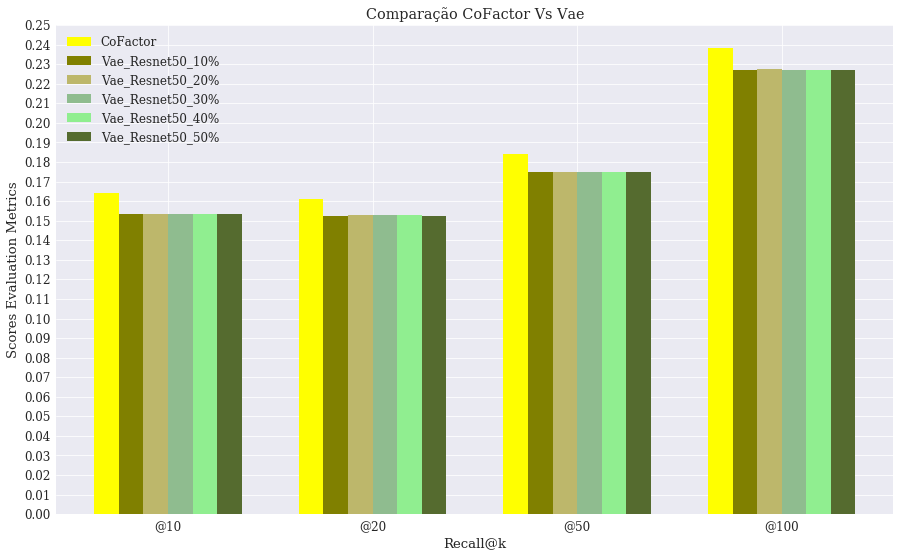

Recall Values:
             @10     @20     @50    @100
CoFactor  0.1640  0.1611  0.1842  0.2381
10%       0.1535  0.1525  0.1751  0.2271
20%       0.1535  0.1527  0.1750  0.2273
30%       0.1534  0.1528  0.1749  0.2271
40%       0.1532  0.1528  0.1749  0.2271
50%       0.1532  0.1526  0.1751  0.2272





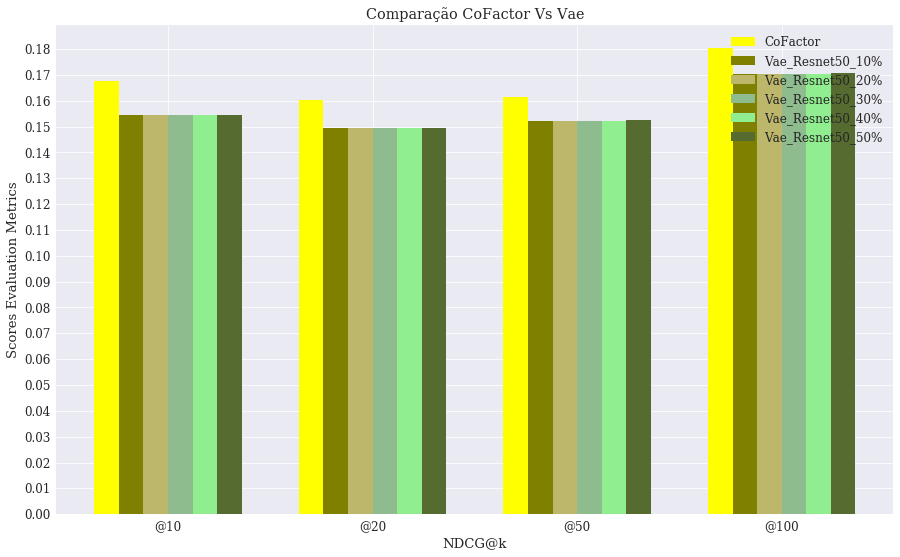

NDCG Values:
             @10     @20     @50    @100
CoFactor  0.1675  0.1601  0.1615  0.1803
10%       0.1546  0.1494  0.1523  0.1705
20%       0.1546  0.1495  0.1522  0.1705
30%       0.1546  0.1495  0.1522  0.1705
40%       0.1545  0.1495  0.1522  0.1704
50%       0.1546  0.1495  0.1524  0.1706





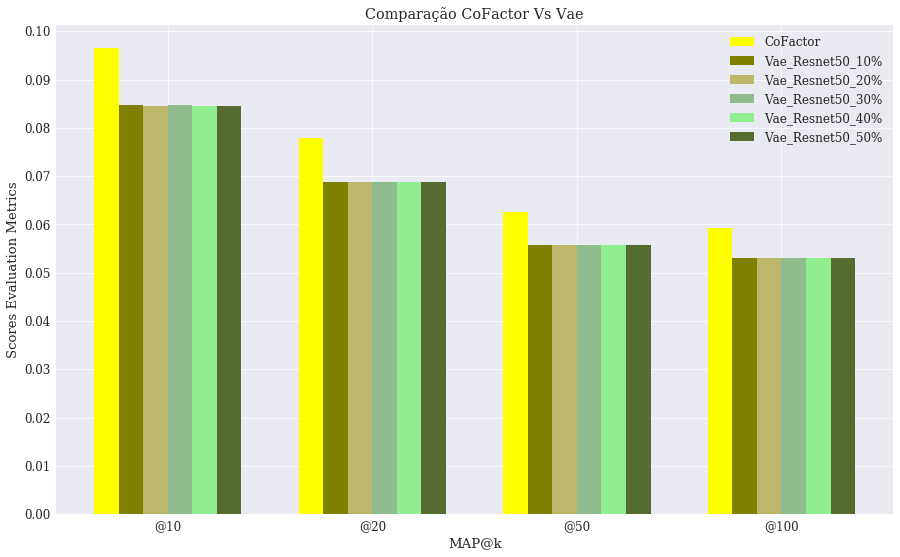

MAP Values:
             @10     @20     @50    @100
CoFactor  0.0965  0.0780  0.0625  0.0593
10%       0.0848  0.0688  0.0558  0.0530
20%       0.0846  0.0688  0.0557  0.0530
30%       0.0847  0.0688  0.0557  0.0530
40%       0.0846  0.0688  0.0557  0.0530
50%       0.0846  0.0688  0.0558  0.0530


In [9]:
list_file_name = ['vae_resnet50_10_pct_rec_val'
                  , 'vae_resnet50_20_pct_rec_val'
                  , 'vae_resnet50_30_pct_rec_val'
                  , 'vae_resnet50_40_pct_rec_val'
                  , 'vae_resnet50_50_pct_rec_val']

CoFactor_dic, file_dic = prepraraFiles(list_file_name, file_path)
geraGraficos(CoFactor_dic, file_dic, True)

-------------------------------------------------------------------------------------------------------------------

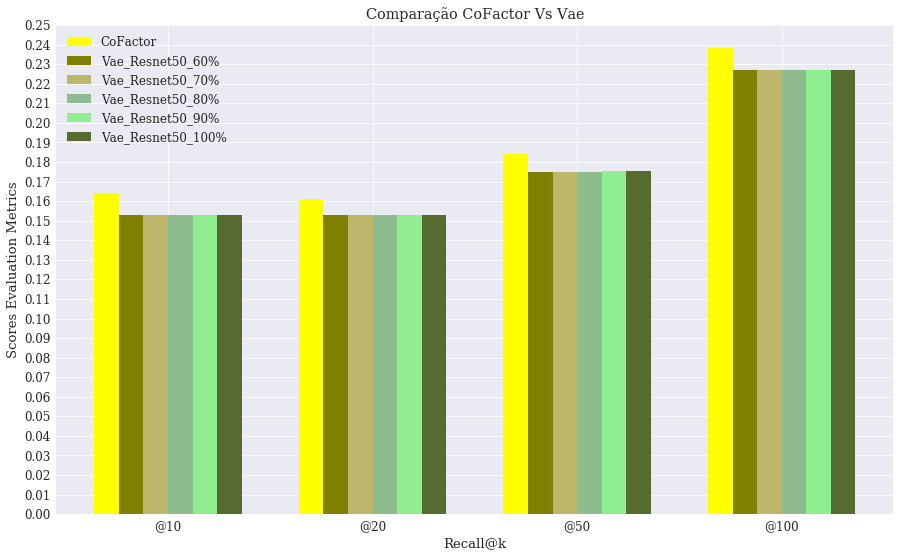

Recall Values:
             @10     @20     @50    @100
CoFactor  0.1640  0.1611  0.1842  0.2381
60%       0.1528  0.1527  0.1751  0.2271
70%       0.1527  0.1527  0.1749  0.2270
80%       0.1527  0.1527  0.1749  0.2271
90%       0.1530  0.1527  0.1755  0.2272
100%      0.1530  0.1527  0.1755  0.2272





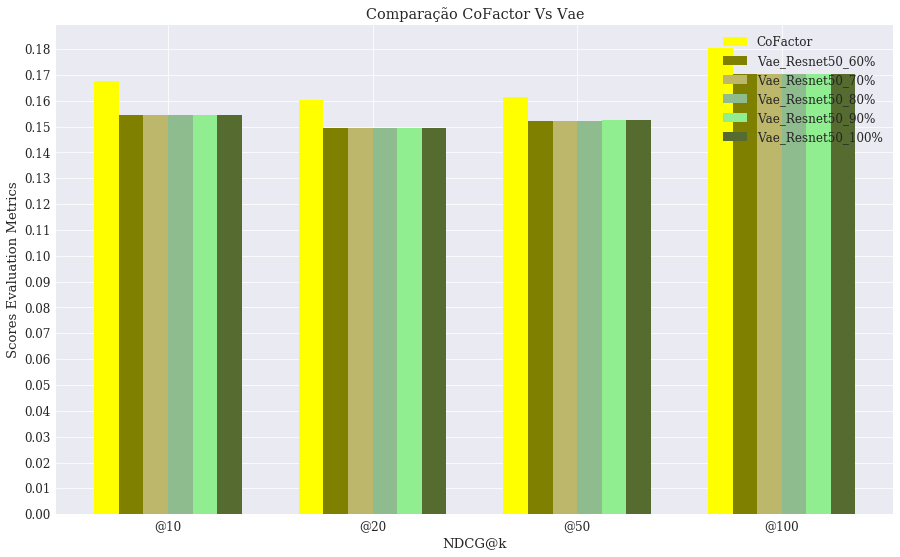

NDCG Values:
             @10     @20     @50    @100
CoFactor  0.1675  0.1601  0.1615  0.1803
60%       0.1545  0.1496  0.1523  0.1704
70%       0.1544  0.1496  0.1522  0.1704
80%       0.1545  0.1496  0.1522  0.1704
90%       0.1545  0.1495  0.1524  0.1705
100%      0.1544  0.1495  0.1524  0.1704





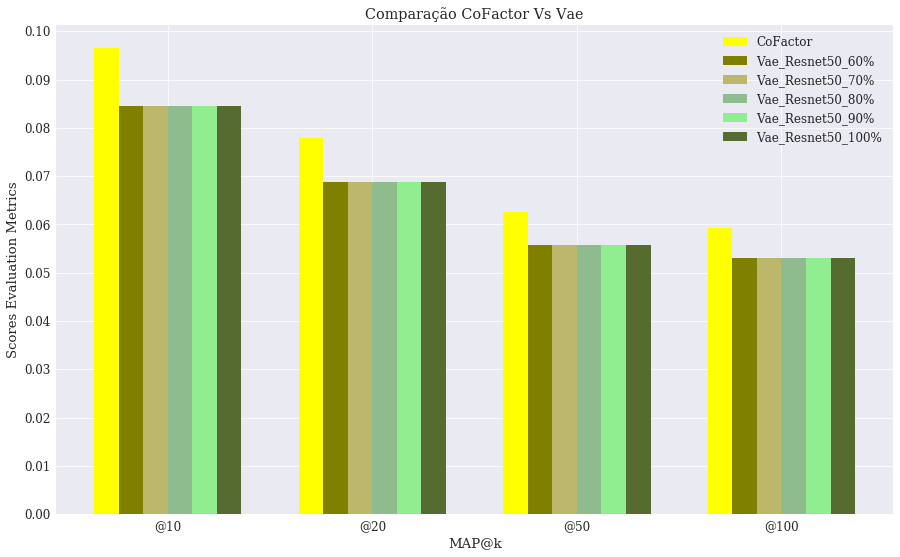

MAP Values:
             @10     @20     @50    @100
CoFactor  0.0965  0.0780  0.0625  0.0593
60%       0.0846  0.0689  0.0557  0.0530
70%       0.0846  0.0689  0.0557  0.0530
80%       0.0846  0.0688  0.0557  0.0530
90%       0.0846  0.0688  0.0557  0.0530
100%      0.0846  0.0688  0.0557  0.0530


In [10]:
list_file_name = ['vae_resnet50_60_pct_rec_val'
                  , 'vae_resnet50_70_pct_rec_val'
                  , 'vae_resnet50_80_pct_rec_val'
                  , 'vae_resnet50_90_pct_rec_val'
                  , 'vae_resnet50_100_pct_rec_val']
CoFactor_dic, file_dic = prepraraFiles(list_file_name, file_path)
geraGraficos(CoFactor_dic, file_dic, False)

-------------------------------------------------------------------------------------------------------------------

## Gráficos CoFactor Vs Rede Neural Vgg16

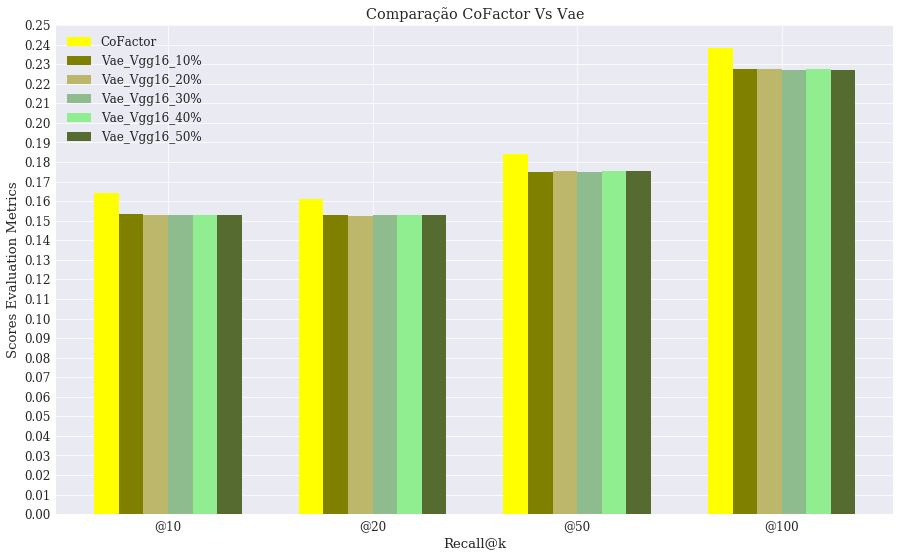

Recall Values:
             @10     @20     @50    @100
CoFactor  0.1640  0.1611  0.1842  0.2381
10%       0.1536  0.1527  0.1751  0.2273
20%       0.1529  0.1526  0.1754  0.2274
30%       0.1527  0.1527  0.1751  0.2271
40%       0.1528  0.1527  0.1756  0.2273
50%       0.1531  0.1527  0.1755  0.2272





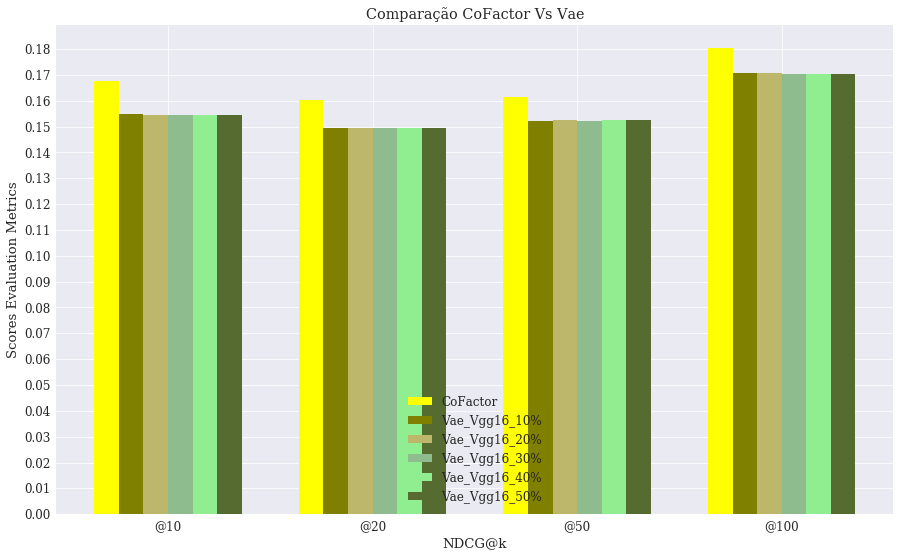

NDCG Values:
             @10     @20     @50    @100
CoFactor  0.1675  0.1601  0.1615  0.1803
10%       0.1547  0.1496  0.1523  0.1706
20%       0.1545  0.1495  0.1524  0.1706
30%       0.1544  0.1496  0.1522  0.1704
40%       0.1544  0.1495  0.1525  0.1705
50%       0.1545  0.1495  0.1524  0.1705





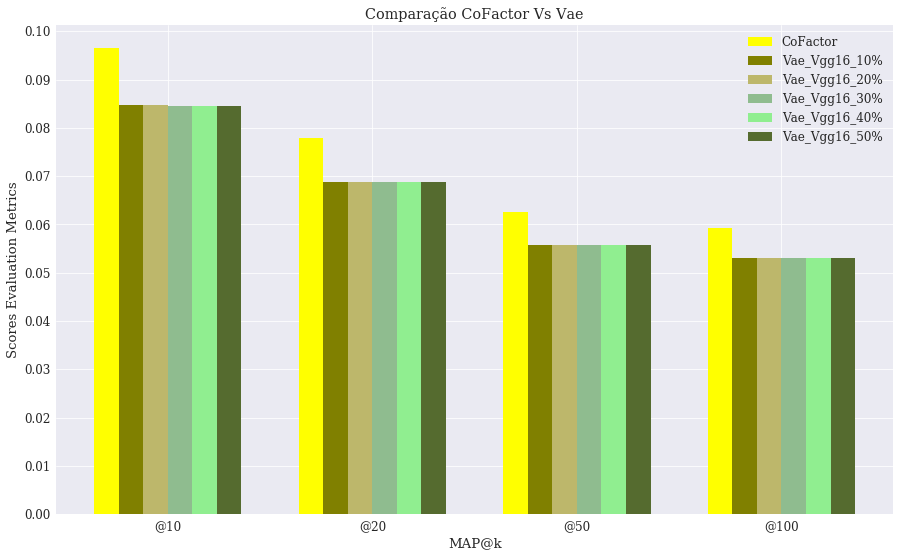

MAP Values:
             @10     @20     @50    @100
CoFactor  0.0965  0.0780  0.0625  0.0593
10%       0.0848  0.0688  0.0558  0.0530
20%       0.0847  0.0688  0.0558  0.0530
30%       0.0846  0.0689  0.0557  0.0530
40%       0.0846  0.0687  0.0558  0.0530
50%       0.0846  0.0687  0.0557  0.0530


In [11]:
list_file_name = ['vae_vgg16_10_pct_rec_val'
                  , 'vae_vgg16_20_pct_rec_val'
                  , 'vae_vgg16_30_pct_rec_val'
                  , 'vae_vgg16_40_pct_rec_val'
                  , 'vae_vgg16_50_pct_rec_val'
                  ]

CoFactor_dic, file_dic = prepraraFiles(list_file_name, file_path)
geraGraficos(CoFactor_dic, file_dic, True)

-------------------------------------------------------------------------------------------------------------------

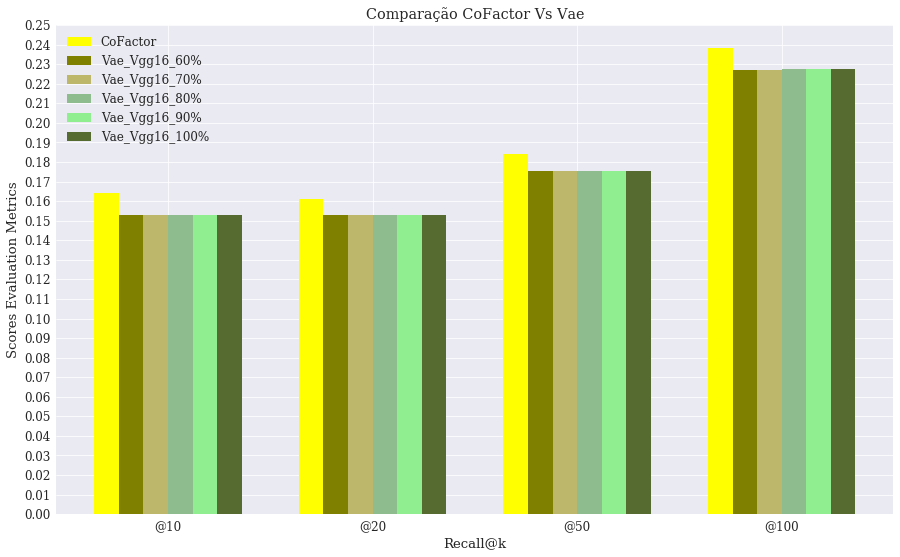

Recall Values:
             @10     @20     @50    @100
CoFactor  0.1640  0.1611  0.1842  0.2381
60%       0.1528  0.1528  0.1755  0.2272
70%       0.1528  0.1528  0.1755  0.2272
80%       0.1528  0.1529  0.1756  0.2273
90%       0.1528  0.1529  0.1756  0.2273
100%      0.1528  0.1529  0.1756  0.2274





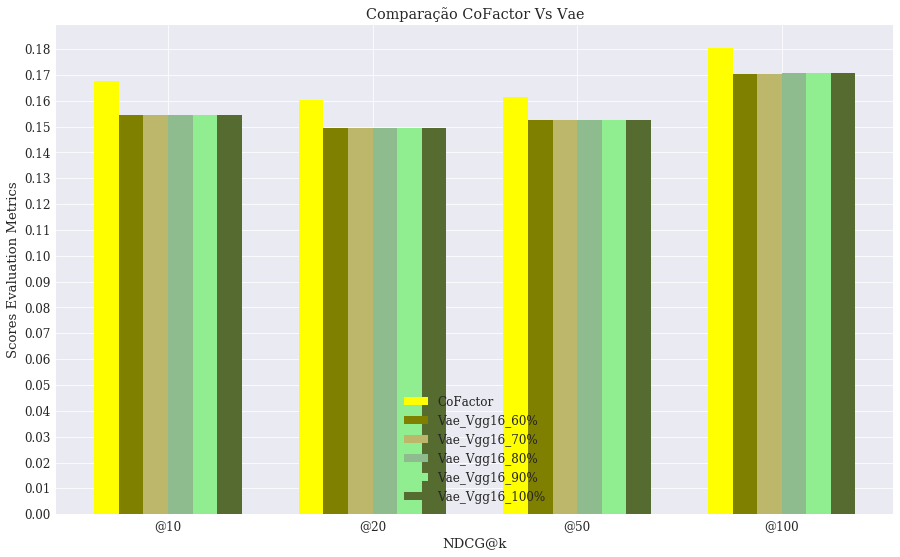

NDCG Values:
             @10     @20     @50    @100
CoFactor  0.1675  0.1601  0.1615  0.1803
60%       0.1544  0.1495  0.1525  0.1705
70%       0.1545  0.1496  0.1524  0.1705
80%       0.1544  0.1496  0.1525  0.1706
90%       0.1544  0.1496  0.1525  0.1706
100%      0.1544  0.1496  0.1525  0.1706





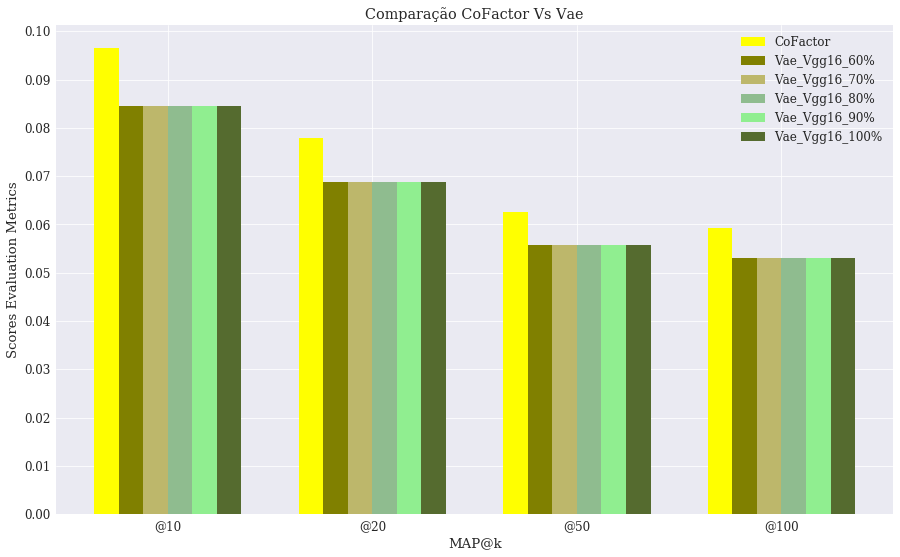

MAP Values:
             @10     @20     @50    @100
CoFactor  0.0965  0.0780  0.0625  0.0593
60%       0.0846  0.0687  0.0558  0.0530
70%       0.0846  0.0688  0.0557  0.0530
80%       0.0846  0.0688  0.0558  0.0530
90%       0.0846  0.0688  0.0558  0.0530
100%      0.0846  0.0688  0.0558  0.0530


In [12]:
list_file_name = ['vae_vgg16_60_pct_rec_val'
                  , 'vae_vgg16_70_pct_rec_val'
                  , 'vae_vgg16_80_pct_rec_val'
                  , 'vae_vgg16_90_pct_rec_val'
                  ,'vae_vgg16_100_pct_rec_val']
CoFactor_dic, file_dic = prepraraFiles(list_file_name, file_path)
geraGraficos(CoFactor_dic, file_dic, False)

-------------------------------------------------------------------------------------------------------------------

## Gráficos CoFactor Vs Rede Neural Vgg19

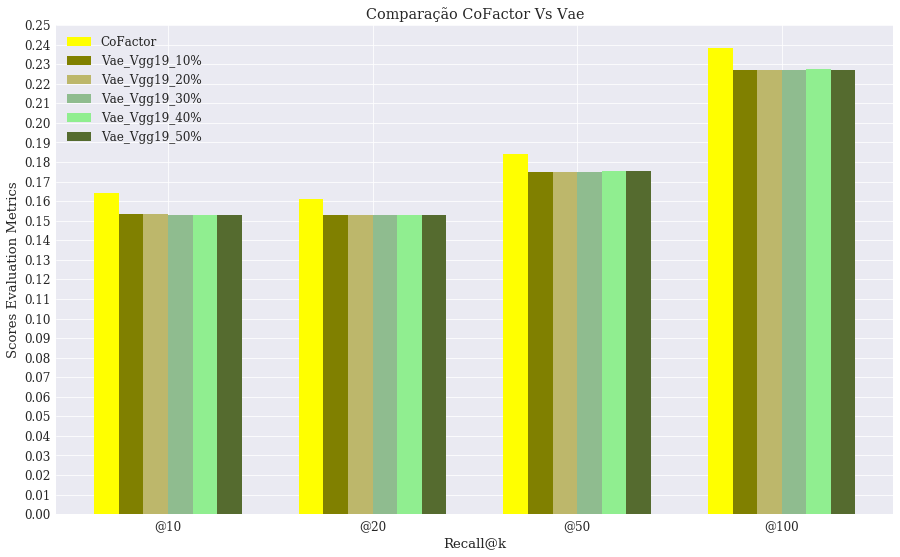

Recall Values:
             @10     @20     @50    @100
CoFactor  0.1640  0.1611  0.1842  0.2381
10%       0.1536  0.1528  0.1751  0.2272
20%       0.1534  0.1528  0.1749  0.2272
30%       0.1527  0.1527  0.1751  0.2271
40%       0.1528  0.1527  0.1756  0.2273
50%       0.1531  0.1527  0.1755  0.2272





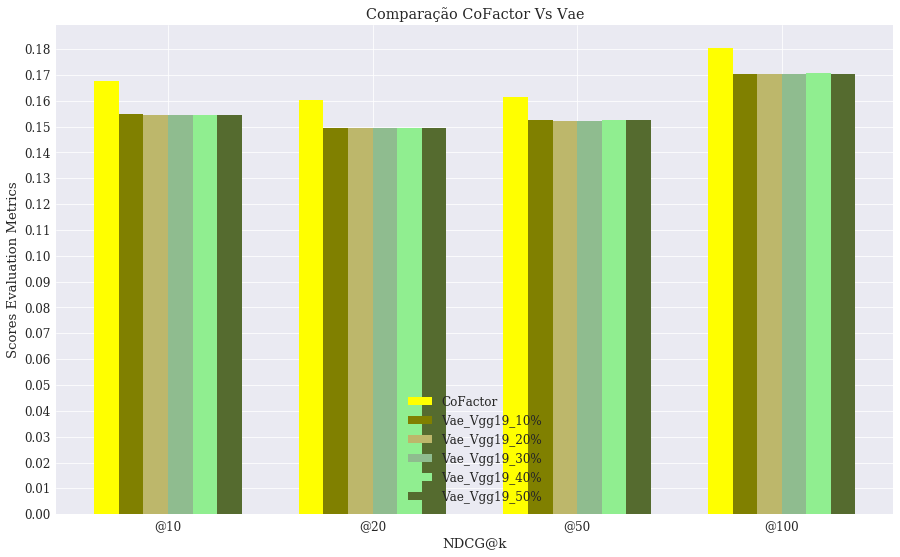

NDCG Values:
             @10     @20     @50    @100
CoFactor  0.1675  0.1601  0.1615  0.1803
10%       0.1547  0.1496  0.1524  0.1705
20%       0.1545  0.1495  0.1521  0.1704
30%       0.1544  0.1496  0.1523  0.1704
40%       0.1544  0.1495  0.1525  0.1706
50%       0.1545  0.1495  0.1524  0.1705





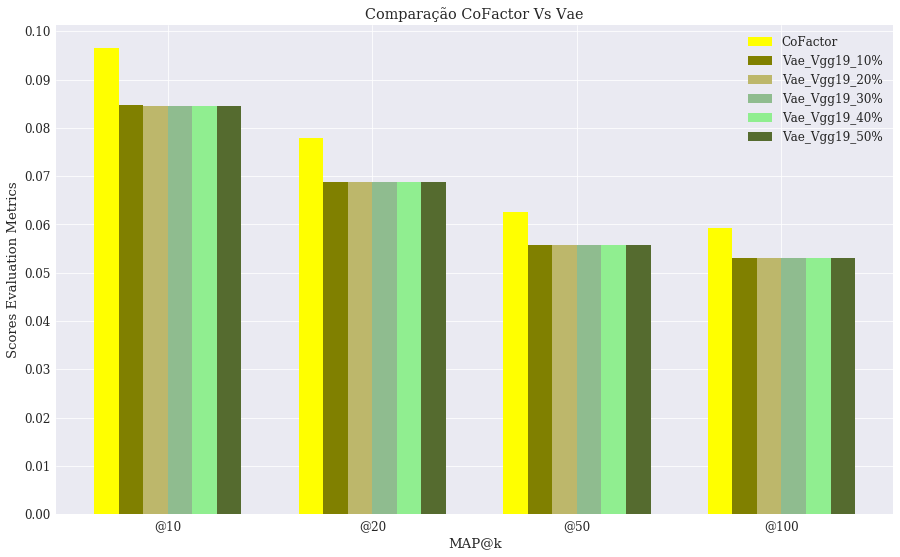

MAP Values:
             @10     @20     @50    @100
CoFactor  0.0965  0.0780  0.0625  0.0593
10%       0.0848  0.0689  0.0558  0.0530
20%       0.0846  0.0688  0.0557  0.0530
30%       0.0846  0.0689  0.0557  0.0530
40%       0.0846  0.0687  0.0558  0.0530
50%       0.0846  0.0687  0.0557  0.0530


In [13]:
list_file_name = ['vae_vgg19_10_pct_rec_val'
                  , 'vae_vgg19_20_pct_rec_val'
                  , 'vae_vgg19_30_pct_rec_val'
                  , 'vae_vgg19_40_pct_rec_val'
                  , 'vae_vgg19_50_pct_rec_val'
                  ]

CoFactor_dic, file_dic = prepraraFiles(list_file_name, file_path)
geraGraficos(CoFactor_dic, file_dic, True)

-------------------------------------------------------------------------------------------------------------------

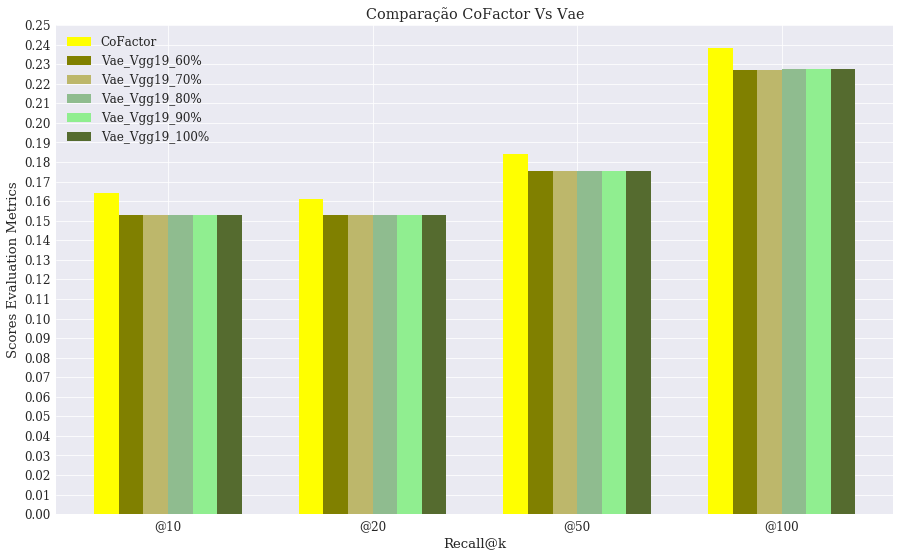

Recall Values:
             @10     @20     @50    @100
CoFactor  0.1640  0.1611  0.1842  0.2381
60%       0.1528  0.1528  0.1755  0.2272
70%       0.1528  0.1529  0.1755  0.2272
80%       0.1528  0.1529  0.1756  0.2273
90%       0.1528  0.1529  0.1756  0.2273
100%      0.1528  0.1529  0.1756  0.2274





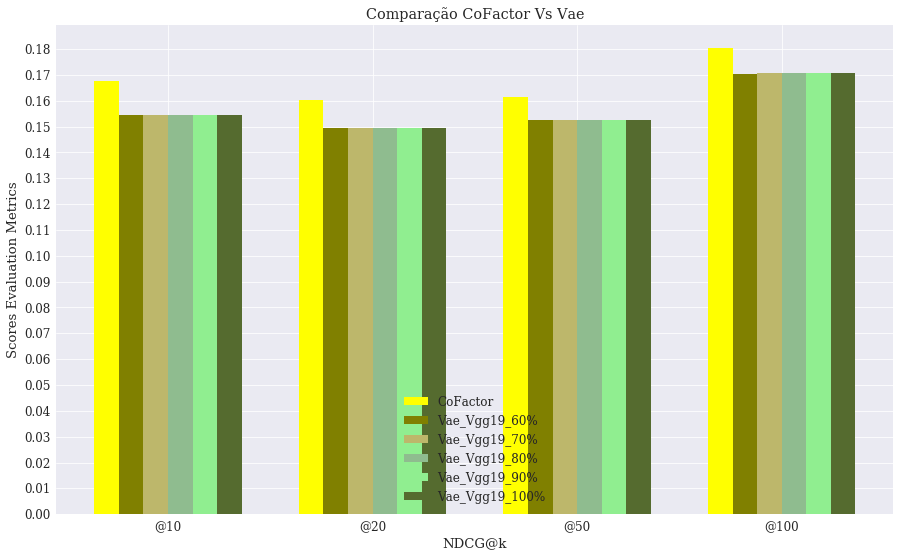

NDCG Values:
             @10     @20     @50    @100
CoFactor  0.1675  0.1601  0.1615  0.1803
60%       0.1544  0.1495  0.1524  0.1705
70%       0.1545  0.1496  0.1524  0.1706
80%       0.1544  0.1496  0.1525  0.1706
90%       0.1544  0.1496  0.1525  0.1706
100%      0.1544  0.1496  0.1525  0.1706





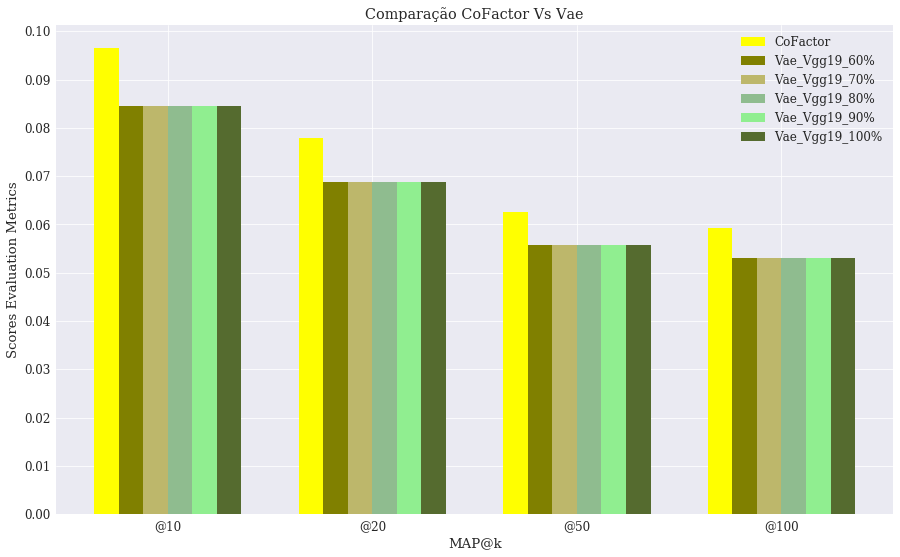

MAP Values:
             @10     @20     @50    @100
CoFactor  0.0965  0.0780  0.0625  0.0593
60%       0.0846  0.0687  0.0557  0.0530
70%       0.0846  0.0688  0.0558  0.0530
80%       0.0846  0.0688  0.0558  0.0530
90%       0.0846  0.0688  0.0558  0.0530
100%      0.0846  0.0688  0.0558  0.0530


In [14]:
list_file_name = ['vae_vgg19_60_pct_rec_val'
                  , 'vae_vgg19_70_pct_rec_val'
                  , 'vae_vgg19_80_pct_rec_val'
                  , 'vae_vgg19_90_pct_rec_val'
                  , 'vae_vgg19_100_pct_rec_val'
                  ]

CoFactor_dic, file_dic = prepraraFiles(list_file_name, file_path)
geraGraficos(CoFactor_dic, file_dic, False)

-------------------------------------------------------------------------------------------------------------------

## Gráficos CoFactor Vs Rede Neural Xception

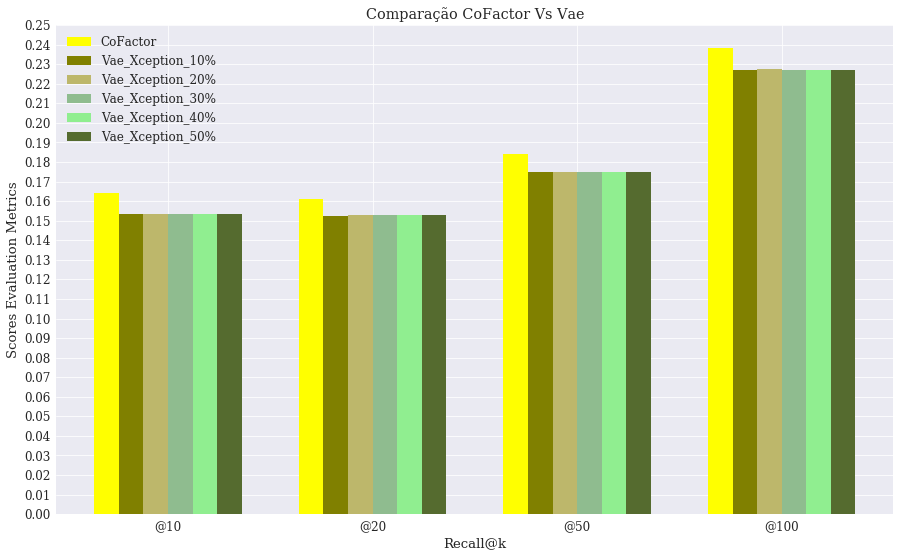

Recall Values:
             @10     @20     @50    @100
CoFactor  0.1640  0.1611  0.1842  0.2381
10%       0.1534  0.1524  0.1751  0.2271
20%       0.1535  0.1527  0.1750  0.2273
30%       0.1534  0.1528  0.1749  0.2271
40%       0.1532  0.1528  0.1749  0.2271
50%       0.1532  0.1528  0.1751  0.2272





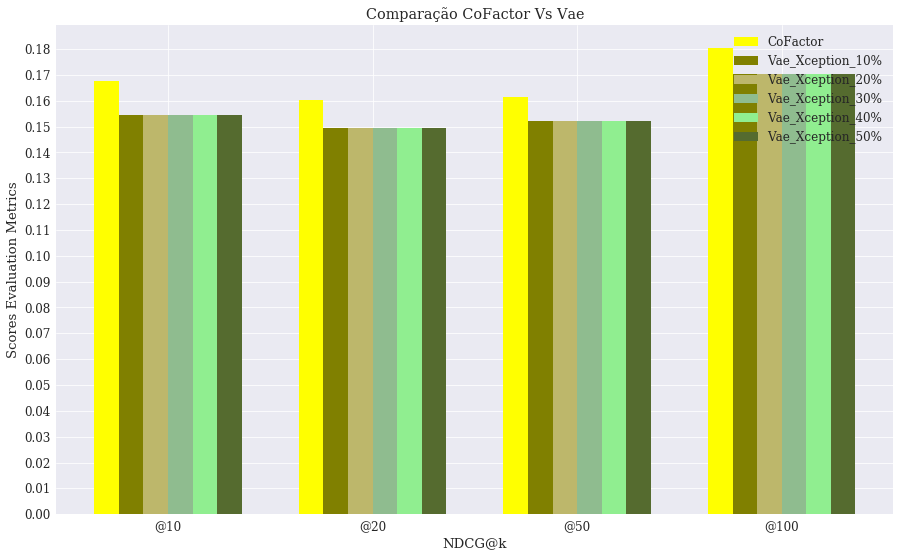

NDCG Values:
             @10     @20     @50    @100
CoFactor  0.1675  0.1601  0.1615  0.1803
10%       0.1545  0.1493  0.1523  0.1705
20%       0.1546  0.1495  0.1523  0.1705
30%       0.1546  0.1495  0.1522  0.1704
40%       0.1545  0.1495  0.1522  0.1704
50%       0.1546  0.1496  0.1523  0.1705





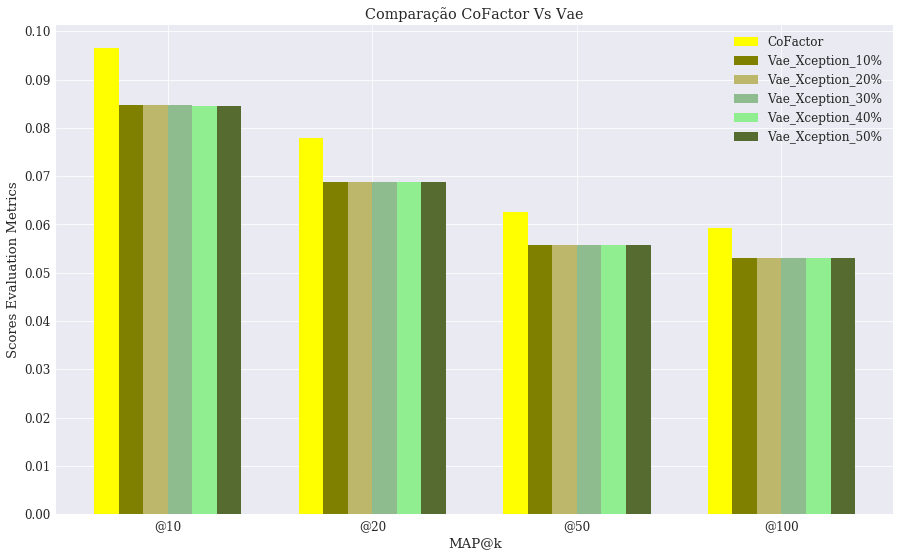

MAP Values:
             @10     @20     @50    @100
CoFactor  0.0965  0.0780  0.0625  0.0593
10%       0.0847  0.0688  0.0558  0.0530
20%       0.0847  0.0688  0.0557  0.0530
30%       0.0847  0.0688  0.0557  0.0530
40%       0.0846  0.0688  0.0557  0.0530
50%       0.0846  0.0688  0.0558  0.0530


In [15]:
list_file_name = ['vae_xception_10_pct_rec_val'
                  , 'vae_xception_20_pct_rec_val'
                  , 'vae_xception_30_pct_rec_val'
                  , 'vae_xception_40_pct_rec_val'
                  , 'vae_xception_50_pct_rec_val'
                  ]

CoFactor_dic, file_dic = prepraraFiles(list_file_name, file_path)
geraGraficos(CoFactor_dic, file_dic, True)

-------------------------------------------------------------------------------------------------------------------

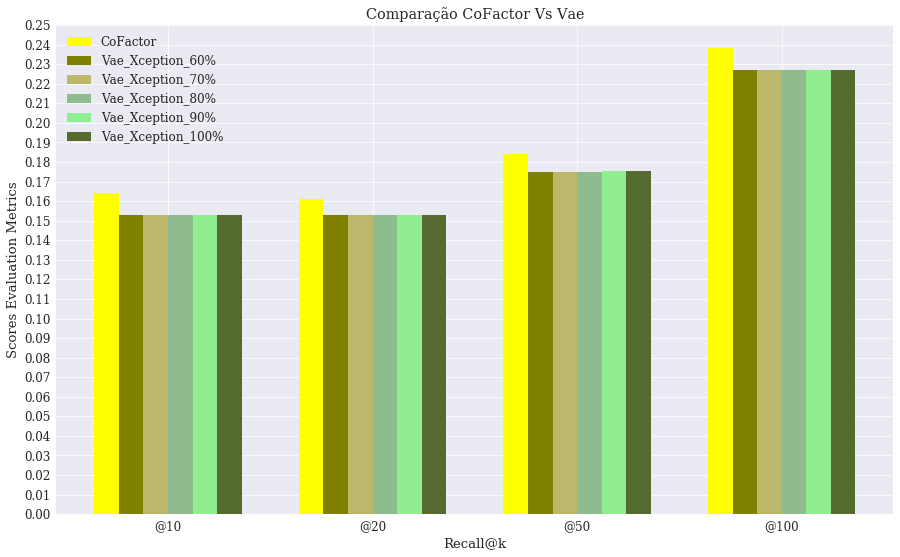

Recall Values:
             @10     @20     @50    @100
CoFactor  0.1640  0.1611  0.1842  0.2381
60%       0.1527  0.1527  0.1751  0.2271
70%       0.1527  0.1527  0.1749  0.2270
80%       0.1528  0.1527  0.1749  0.2270
90%       0.1531  0.1527  0.1755  0.2272
100%      0.1530  0.1528  0.1755  0.2272





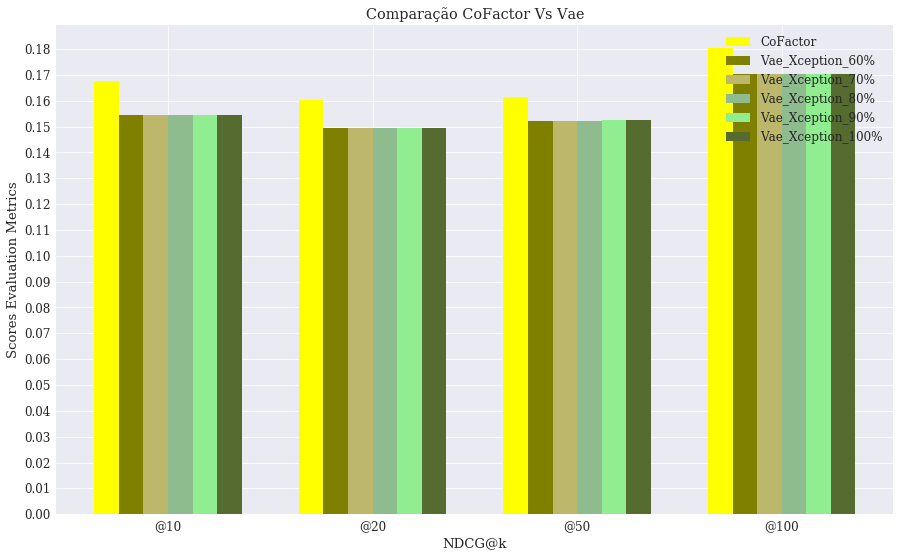

NDCG Values:
             @10     @20     @50    @100
CoFactor  0.1675  0.1601  0.1615  0.1803
60%       0.1544  0.1496  0.1523  0.1704
70%       0.1544  0.1496  0.1522  0.1704
80%       0.1545  0.1496  0.1522  0.1704
90%       0.1545  0.1495  0.1524  0.1705
100%      0.1544  0.1495  0.1524  0.1705





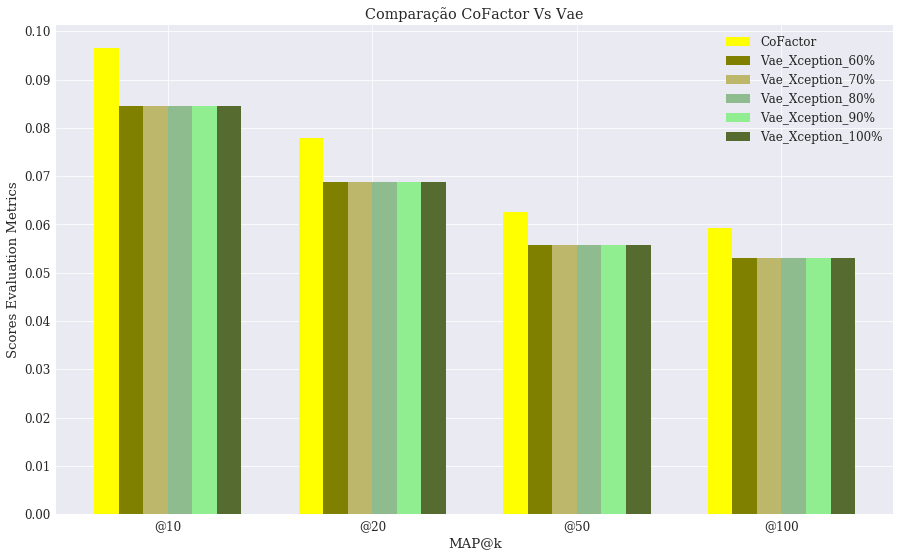

MAP Values:
             @10     @20     @50    @100
CoFactor  0.0965  0.0780  0.0625  0.0593
60%       0.0846  0.0689  0.0557  0.0530
70%       0.0846  0.0689  0.0557  0.0530
80%       0.0846  0.0688  0.0557  0.0530
90%       0.0846  0.0687  0.0557  0.0530
100%      0.0846  0.0688  0.0558  0.0530


In [16]:
list_file_name = ['vae_xception_60_pct_rec_val'
                  , 'vae_xception_70_pct_rec_val'
                  , 'vae_xception_80_pct_rec_val'
                  , 'vae_xception_90_pct_rec_val'
                  , 'vae_xception_100_pct_rec_val'
                  ]

CoFactor_dic, file_dic = prepraraFiles(list_file_name, file_path)
geraGraficos(CoFactor_dic, file_dic, False)
